# PART A

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime as dt 
from statsmodels.tsa.stattools import adfuller , acf , pacf
from statsmodels.tsa.arima_model import ARIMA
import math 
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('AirPassengers.csv')

In [3]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [4]:
data['Month']=data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [5]:
ts = data['#Passengers']

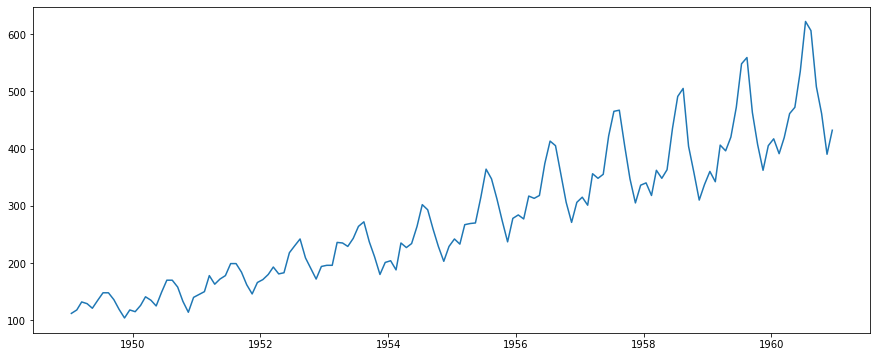

In [6]:
plt.plot(ts)

In [7]:
ts_log = np.log(ts)

In [8]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52,center=False).mean()
    rolstd = timeseries.rolling(window=52,center=False).std()
    
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label="Rolling Mean")
    std = plt.plot(rolstd,color="black",label="Rolling Std")
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','P-value','#Lags Used',
                                           'Number of Observations Used'])
    
    for key , value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

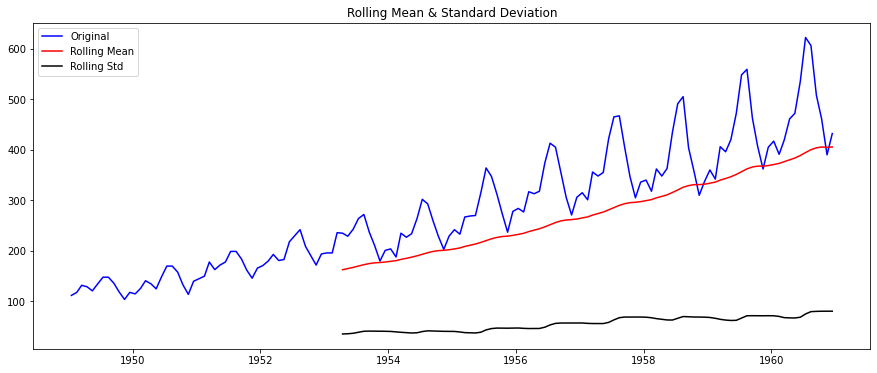

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
P-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [9]:
test_stationarity(data['#Passengers'])

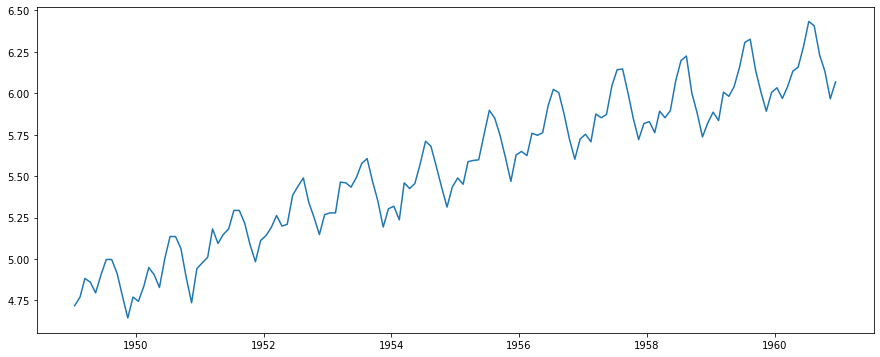

In [10]:
plt.plot(ts_log)

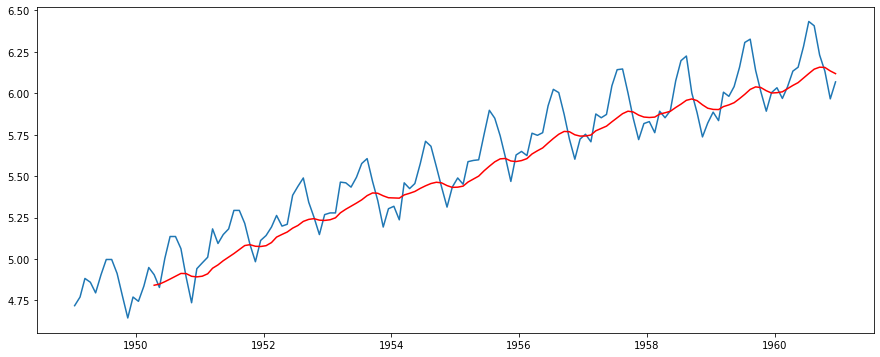

In [11]:
movingAverage = ts_log.rolling(window=16).mean()
movingSTD =  ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color='red')

In [12]:
ts_log_mv_diff=ts_log - movingAverage
ts_log_mv_diff.head(16)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1950-04-15    0.063438
1950-05-15   -0.020387
1950-06-15    0.140667
1950-07-15    0.256707
1950-08-15    0.239458
1950-09-15    0.149579
1950-10-15   -0.021734
1950-11-15   -0.159571
1950-12-15    0.049346
1951-01-15    0.080432
Name: #Passengers, dtype: float64

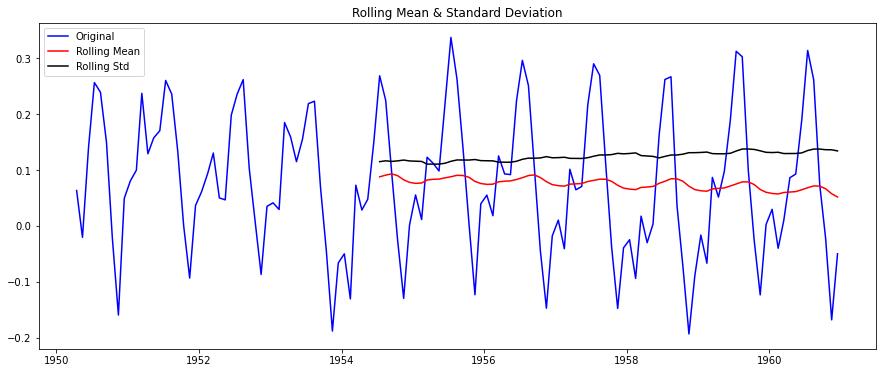

Results of Dickey-Fuller Test:
Test Statistic                  -3.228925
P-value                          0.018370
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [13]:
test_stationarity(ts_log_mv_diff)

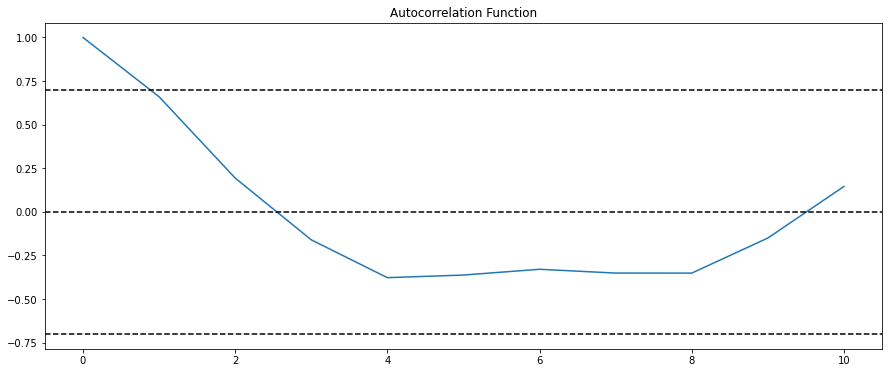

In [19]:
#Plotting ACF
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle="--",color="black")
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle="--",color="black")
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle="--",color="black")
plt.title("Autocorrelation Function")
plt.show()

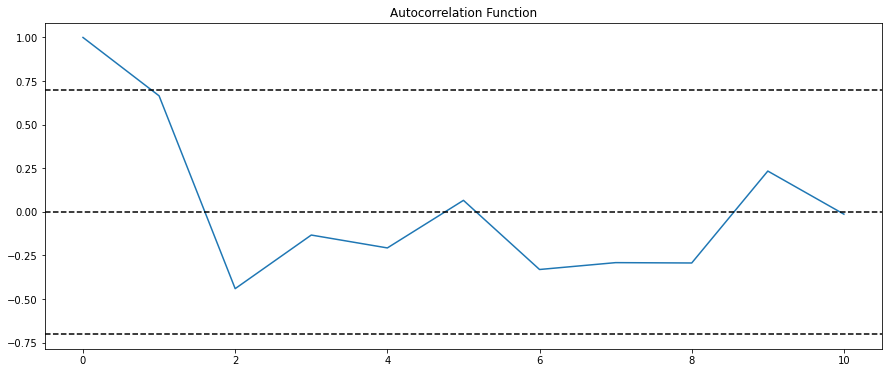

In [24]:
#PLOTTING PSAF
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle="--",color="black")
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle="--",color="black")
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle="--",color="black")
plt.title("Autocorrelation Function")
plt.show()

In [25]:
model = ARIMA(ts_log,order=(1,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%.4F'% sum((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
